In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

# special matplotlib argument for improved plots
from matplotlib import rcParams
from sklearn.cross_validation import train_test_split 

/home/iamcodex/ml/local/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
print(boston.keys())
print(boston.data.shape)
print(boston.feature_names)
print(boston.DESCR)
bos = pd.DataFrame(boston.data)
print(bos.head())
bos.columns = boston.feature_names
print(bos.head())
print(boston.target.shape)
bos['PRICE'] = boston.target
print(bos.head())

['data', 'feature_names', 'DESCR', 'target']
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.

In [4]:
print(bos.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.593761   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.596783   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.647423   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [5]:
X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


Text(0.5,1,'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

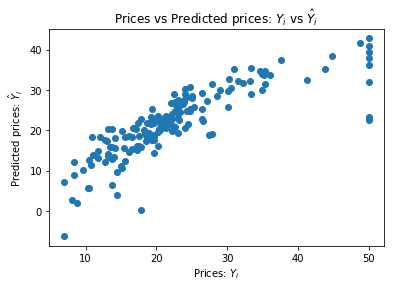

In [7]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred1 = lm.predict(X_test)

plt.scatter(Y_test, Y_pred1)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [8]:
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred1)
print(mse)

28.541367275618338


In [9]:
from sklearn.tree import DecisionTreeRegressor

30.730598802395207


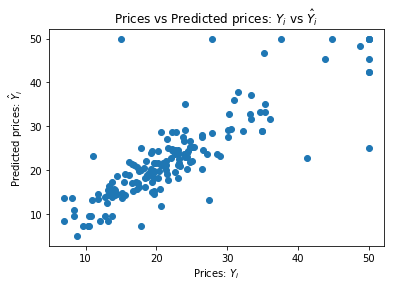

In [10]:
dt = DecisionTreeRegressor(random_state = 0)
dt.fit(X_train, Y_train)
Y_pred2 = dt.predict(X_test)
plt.scatter(Y_test, Y_pred2)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred2)
print(mse)

In [11]:
from sklearn.ensemble import RandomForestRegressor

14.272649700598803


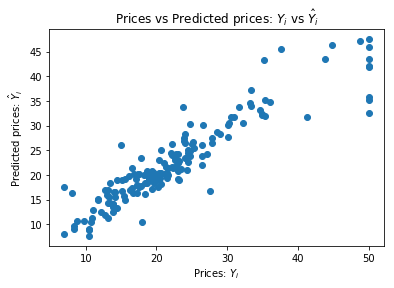

In [12]:
dt = RandomForestRegressor()
dt.fit(X_train, Y_train)
Y_pred3 = dt.predict(X_test)
plt.scatter(Y_test, Y_pred3)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred3)
print(mse)

In [13]:
from sklearn.ensemble import GradientBoostingRegressor

8.092436413210743


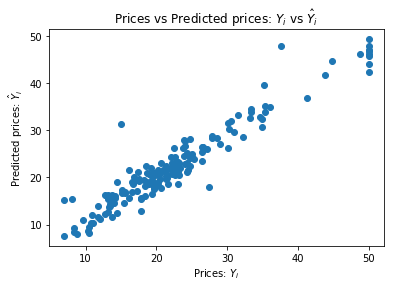

In [14]:
dt = GradientBoostingRegressor()
dt.fit(X_train, Y_train)
Y_pred4 = dt.predict(X_test)
plt.scatter(Y_test, Y_pred4)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred4)
print(mse)

In [15]:
from sklearn.neural_network import MLPRegressor

863.5688167102091


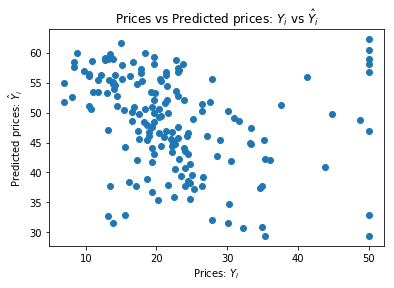

In [16]:
dt = MLPRegressor()
dt.fit(X_train, Y_train)
Y_pred5 = dt.predict(X_test)
plt.scatter(Y_test, Y_pred5)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred5)
print(mse)

In [17]:
from sklearn.svm import SVR

93.21912321793232


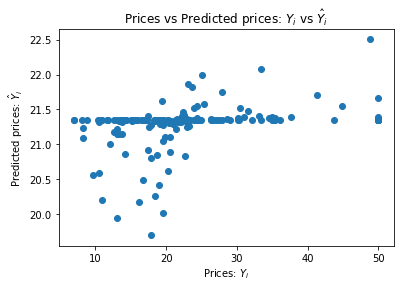

In [18]:
dt = SVR()
dt.fit(X_train, Y_train)
Y_pred6 = dt.predict(X_test)
plt.scatter(Y_test, Y_pred6)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred6)
print(mse)

In [19]:
data = np.array([Y_pred1,Y_pred2,Y_pred3,Y_pred4,Y_pred5,Y_pred6,])
print data.shape
    

(6, 167)


In [20]:
#using ensembling

def ensemble(X_train, Y_train, X_test, Y_test):
    np.random.seed(56)
    ens = []
    ens_pred = []
    ens_list = [LinearRegression(),DecisionTreeRegressor(), RandomForestRegressor(), GradientBoostingRegressor(), MLPRegressor(), SVR()]
    for i in range(len(ens_list)):
        ens_list[i].fit(X_train, Y_train)
        Y_pred = ens_list[i].predict(X_test)
        mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
        if(mse<=25):
            print mse, ens_list[i]
            ens.append(ens_list[i].predict(X_train))
            ens_pred.append(Y_pred)
    ens = np.array(ens)
    ens_pred = np.array(ens_pred)
    ens = ens.transpose()
    ens_pred = ens_pred.transpose()
    print ens.shape, ens_pred.shape
    gbr = LinearRegression()
    gbr.fit(ens, Y_train)
    new_pred = gbr.predict(ens_pred)
    mse = sklearn.metrics.mean_squared_error(Y_test, new_pred)
    print mse
    plt.scatter(Y_test, new_pred)
    plt.xlabel("Prices: $Y_i$")
    plt.ylabel("Predicted prices: $\hat{Y}_i$")
    plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

16.645534131736525 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
8.055493018657657 GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)
(339, 2) (167, 2)
8.291717295642076


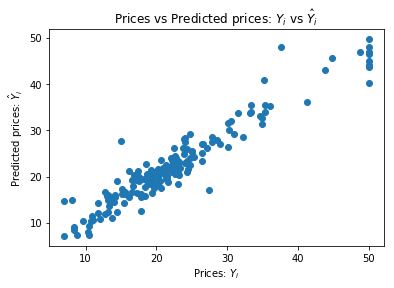

In [21]:
ensemble(X_train, Y_train, X_test, Y_test)